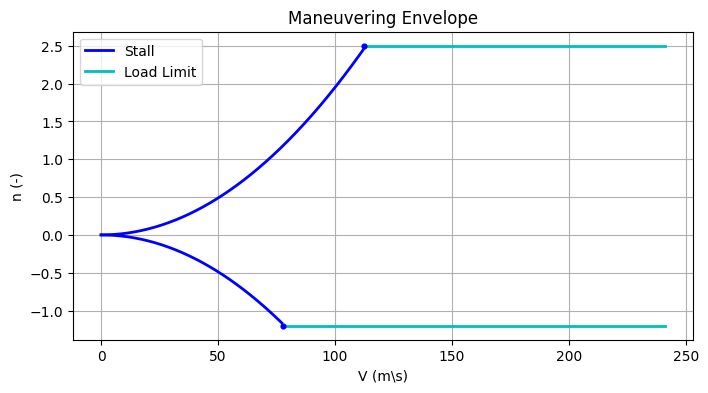

In [36]:
import numpy as np
import matplotlib.pyplot as plt

maxV = 241  # the maximum velocity value to plot to
N = 500     # the number of points in the arrays that are plotted

V = np.linspace(0, maxV, N)    #redo based on cruise speed
n_stall = 0.0001948*V**2        #redo based on density, lift coefficient, and wing loading

# Redo for our aircraft
pos_limitLoad = np.array([2.5, 2.5])
neg_limitLoad = np.array([-1.2, -1.2])

# Solve for V in 'n_stall' equation to get the intersect with horizontal lines from above
pos_intersect_index = int(((np.sqrt(2.5 / 0.000198)) / maxV) * N)
neg_intersect_index = int(((np.sqrt(1.2 / 0.000198)) / maxV) * N)
pos_intersect = V[pos_intersect_index]
neg_intersect = V[neg_intersect_index]
pos_limitV = np.array([pos_intersect, maxV])
neg_limitV = np.array([neg_intersect, maxV])
# plt.plot(pos_limitV, pos_limitLoad) will plot a horizontal line because each dataset contains two points (x,y)

# Update Velocity and Load arrays to be cutoff after intersection
V_upper = V[:pos_intersect_index]
n_stall_upper = n_stall[:pos_intersect_index]
V_lower = V[:neg_intersect_index]
n_stall_lower = -n_stall[:neg_intersect_index]


plt.figure(figsize=(8,4))
plt.title('Maneuvering Envelope')
plt.xlabel("V (m\s)")
plt.ylabel("n (-)")
plt.plot(V_upper,n_stall_upper, label='Stall', linestyle='-', linewidth=2, marker=None, markersize=8, color='b')
plt.plot(V_lower,n_stall_lower, linestyle='-', linewidth=2, marker=None, markersize=8, color='b')
plt.plot(pos_limitV, pos_limitLoad, label='Load Limit', linestyle='-', linewidth=2, marker=None, markersize=8, color='c')
plt.plot(neg_limitV, neg_limitLoad, linestyle='-', linewidth=2, marker=None, markersize=8, color='c')
plt.scatter(pos_limitV[0], pos_limitLoad[0],s=12, color='b', zorder=2)
plt.scatter(neg_limitV[0], neg_limitLoad[0],s=12, color='b', zorder=2)
plt.grid(True)
plt.legend(loc='best')
plt.show()